In [1]:
import pandas as pd
import os

## To merge the information of 12 months file in one file

In [2]:

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df1 = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df1])



## To save our merged data file in csv format.

In [3]:
all_months_data.to_csv("all_data_csv.csv",index=False)

In [4]:
all_data = pd.read_csv("all_data_csv.csv")

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# To add required coulmns

In [7]:
all_data["Month"] = all_data["Order Date"].str[0:2]

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Handling null values

In [10]:
all_data.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
Month               544
dtype: int64

In [11]:
all_data.dropna(how="all",inplace = True)

In [12]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [13]:
len(all_data[all_data["Month"].str.contains("or",case = False)])

355

In [14]:
all_data.shape

(186305, 7)

In [47]:
all_data = all_data[all_data["Month"]!="Or"]  # To clean the column month

### to change the datatype of month

In [48]:
all_data["Month"] = all_data["Month"].astype('int32') 

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [49]:
all_data["Price Each"] = all_data["Price Each"].astype('float')
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # to change the datatype

In [51]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"] # To add sales column

In [52]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


# Que: Which month has the highest sale

In [53]:
all_data.groupby("Month",as_index = False)["Sales"].sum().\
sort_values(by = "Sales", ascending = False)

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = all_data.groupby("Month",as_index = False)["Sales"].sum()


<AxesSubplot: xlabel='Month', ylabel='Sales'>

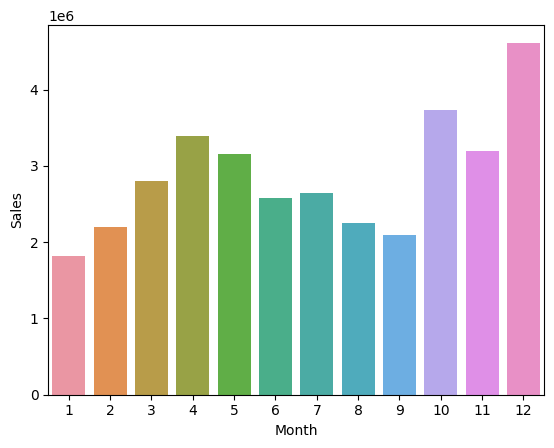

In [56]:
sns.barplot(x= "Month",y= "Sales",data = data)

* We can see that the month of december has highest sales of 4613443.34 dollars
  this might be because of Christmas in december and the month of january has
  lowest sales of 1822256.73 dollars and we can see that in the last months of
  the year the sales was high.

In [57]:
def city_name(address):
    return address.split(",")[1]

def state_name(address):
    return address.split(',')[2].split(' ')[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x : city_name(x) + " " + state_name(x))
# to add city column with their state code

### Que: Which city has the highest sales?

In [58]:
all_data.groupby("City",as_index = False)["Sales"].sum().\
sort_values(by = "Sales", ascending = False)

,City,Sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


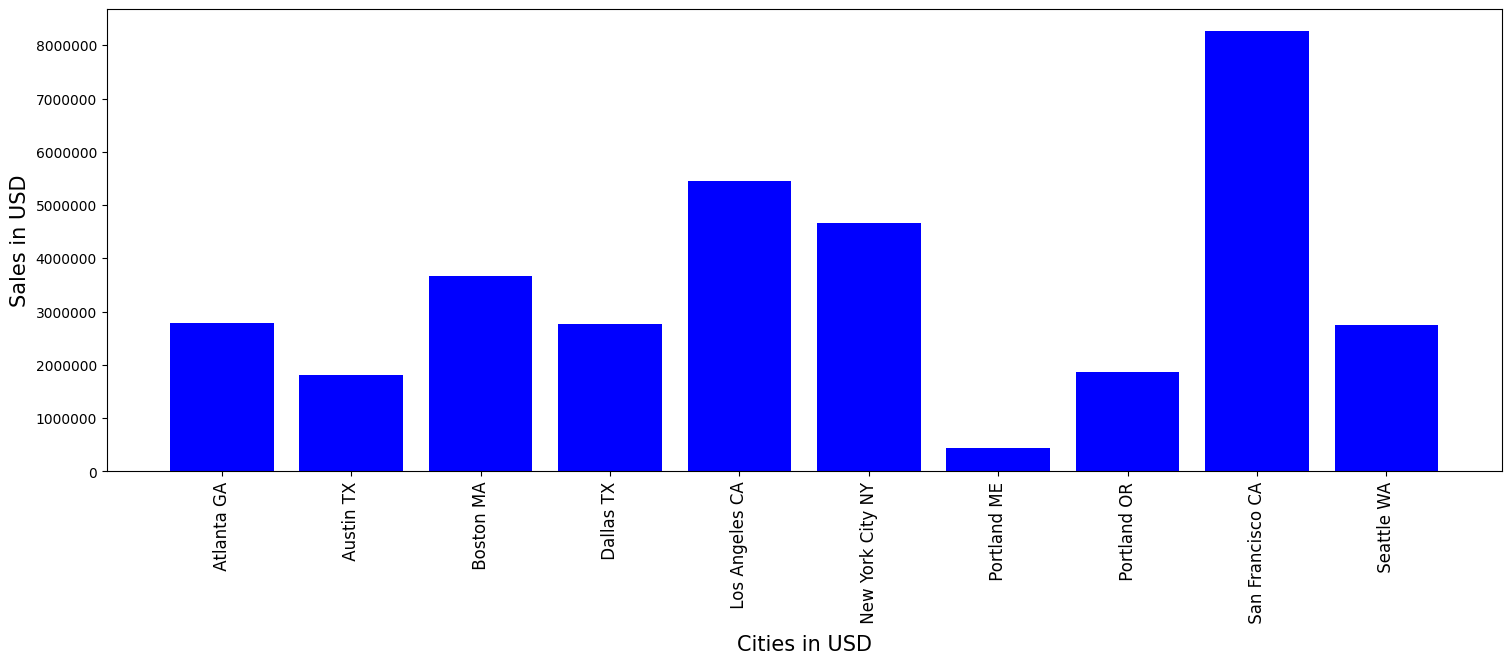

In [28]:
plt.figure(figsize = (18,6))
plt.ticklabel_format(style='plain')
data2 = all_data.groupby("City",as_index = False)["Sales"].sum()
plt.bar(data2["City"],data2["Sales"],color="blue")
plt.xticks(rotation="vertical",size=12)
plt.xlabel("Cities in USD",size=15)
plt.ylabel("Sales in USD",size = 15)
plt.show()


* Highest sales was in San Francisco CA and the lowest sales was in Portland ME

## Que: What time should we display advertisements to maximize likelihood of customers buying product

In [30]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [31]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [33]:
all_data["Hour"] = all_data["Order Date"].dt.hour

In [34]:
all_data.groupby("Hour",as_index = False).count()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748


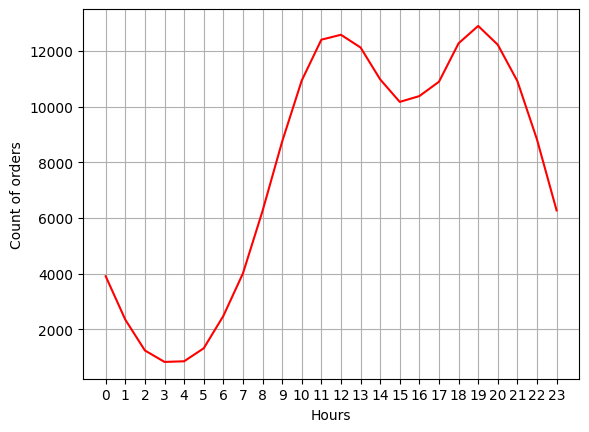

In [35]:
Hours_Count = all_data.groupby("Hour",as_index = False).count()
plt.plot(Hours_Count["Hour"],Hours_Count["Order ID"],"r-")
plt.grid()
plt.xticks(Hours_Count["Hour"])
plt.xlabel("Hours")
plt.ylabel("Count of orders")
plt.show()

* We can say that during 10 to 1 AM or 6 to 8 PM is the best time for advertisement 
  because most of the products are ordered at that time.

# Que: Which products is most expensive

In [39]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [62]:
all_data.groupby("Product")["Price Each"].unique()\
.sort_values( ascending = False)

Product
Macbook Pro Laptop            [1700.0]
ThinkPad Laptop               [999.99]
iPhone                         [700.0]
LG Dryer                       [600.0]
LG Washing Machine             [600.0]
Google Phone                   [600.0]
Vareebadd Phone                [400.0]
27in 4K Gaming Monitor        [389.99]
34in Ultrawide Monitor        [379.99]
Flatscreen TV                  [300.0]
Apple Airpods Headphones       [150.0]
27in FHD Monitor              [149.99]
20in Monitor                  [109.99]
Bose SoundSport Headphones     [99.99]
Lightning Charging Cable       [14.95]
Wired Headphones               [11.99]
USB-C Charging Cable           [11.95]
AA Batteries (4-pack)           [3.84]
AAA Batteries (4-pack)          [2.99]
Name: Price Each, dtype: object

* most expensive product is Macbook Pro Laptop  and most cheap product is AAA Batteries (4-pack) 

# Que: Which products are ordered the most

In [74]:
all_data.groupby("Product",as_index = False)["Quantity Ordered"].sum()\
.sort_values(by = "Quantity Ordered", ascending = False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


* We can see that most ordered product is AAA Batteries (4-pack) which was ordered 31017 times
* Least ordered product is LG Dryer which was ordered 646 times

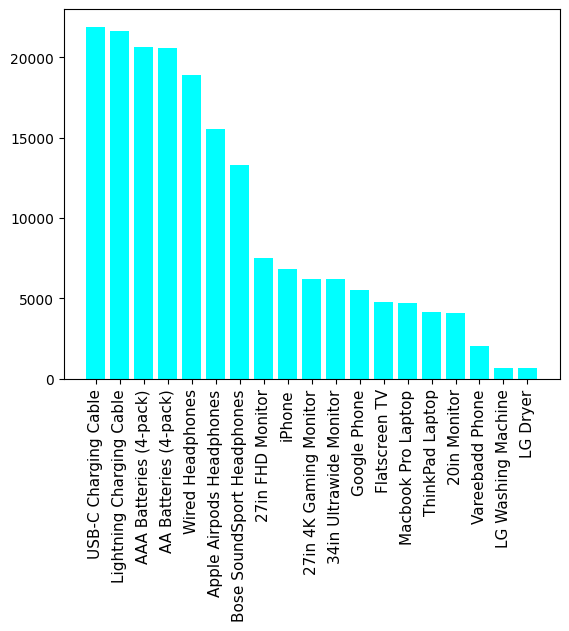

In [71]:
data3 =  all_data.groupby("Product",as_index = False)["Order Date"].count()\
         .sort_values(by = "Order Date", ascending = False)
plt.bar(data3["Product"],data3["Order Date"],color="cyan")
plt.xticks(rotation="vertical",size=11,)
plt.show()

* From above bar graph we can say that price also affects the order quantity of the products
  because most of the most ordered products are of less cost in compare to leadt ordered 
  products